<a href="https://colab.research.google.com/github/ElioRame/ProgrammingAssignment2/blob/master/Another_copy_of_FinalAssignmentPALS0039_finalfinalfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# All seven books are used for the assignments, they are downloaded using read.lines() from library and renamed
with open("/content/pg74.txt") as TomSawyer:
  Book1 = TomSawyer.readlines()
with open("/content/pg84.txt") as Frankenstein:
  Book2 = Frankenstein.readlines()
with open("/content/pg345.txt") as Dracula:
  Book3 = Dracula.readlines()
with open("/content/pg1342.txt") as PrideandPrejudice:
  Book4 = PrideandPrejudice.readlines()
with open("/content/pg1727.txt") as Odissey:
  Book5 = Odissey.readlines()
with open("/content/pg2701.txt") as MobyDick:
  Book6 = MobyDick.readlines()
with open("/content/pg3207.txt") as Leviathan:
  Book7 = Leviathan.readlines()

# They are then added together to create a new list named 'data'
data = Book1 + Book2 + Book3 + Book4 + Book5 + Book6 + Book7
print(data[:50])

['\ufeffThe Project Gutenberg eBook of The Adventures of Tom Sawyer, Complete\n', '    \n', 'This ebook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this ebook or online\n', 'at www.gutenberg.org. If you are not located in the United States,\n', 'you will have to check the laws of the country where you are located\n', 'before using this eBook.\n', '\n', 'Title: The Adventures of Tom Sawyer, Complete\n', '\n', 'Author: Mark Twain\n', '\n', 'Release date: July 1, 2004 [eBook #74]\n', '                Most recently updated: August 9, 2023\n', '\n', 'Language: English\n', '\n', 'Credits: David Widger\n', '\n', '\n', '*** START OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF TOM SAWYER, COMPLETE ***\n', '\n', '\n', '\n', '\n', 'THE ADVENTURES OF TOM SAWYER\n', '\n', '\n', '

In [3]:
!pip install -U nltk>=3.7.0

import nltk


nltk.download("punkt")
nltk.download('punkt_tab')

from nltk.lm import Vocabulary
from nltk.util import pad_sequence
from nltk.tokenize import RegexpTokenizer
from nltk.lm.preprocessing import flatten


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import regex as re

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM, TimeDistributed, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
import string
import collections
import operator
import unicodedata

# Check whether non-Latin alphabet characters are present in the data
# Eliminate non-English characters and punctuation by first defining a function that identifies, using booleans, whether
# all characters are alphabetical and part of the Latin alphabet script in the unicodedata function
# This function also preserves common occurring symbols that are not part of the Latin alphabet (i.e. currency)
# Unicode gives access to list of characters through specifications (in this case 'LATIN' and 'COMMON')
# Therefore it identifies as True items that are part of the latin alphabet
def is_english_letter(letters):
  return str(letters).isalpha() and unicodedata.name(letters).startswith(('LATIN', 'COMMON'))

# Check if present data contains only letters that are part of the Latin alphabet
unwanted_letters = []
for sentence in data:
  for letter in sentence:
   if is_english_letter(letter) == False:
    unwanted_letters.append(letter)
print("Are all letters in the raw text part of the Latin alphabet?", is_english_letter(data))
print("Non-Latin letters in raw text:", set(unwanted_letters))

# There are characters belonging to different alphabets
# Process the dataset to eliminate unwanted characters
# if the item is part of the latin alphabet it is added to a new list
def remove_non_english_letters(data):
    english_list = []
    for letter in data:
        filtered = filter(is_english_letter, list(letter))
        english_string = "".join(filtered)
        english_list.append(english_string)

    return english_list

# Create a list to append the padded and processed text
letters = []

# Texts are stripped of empty strings and spaces and split into a list of lists
# Every item in the list is a sentence in the text, split at every newline
for text in data:
  split_text = text.splitlines()
  for sentence in split_text:
   # The following code creates a new list. For all the sentences in the text, all letters are made lowercase
   # This creates a new list of lists with every letter in every list forming a separate token
     lower_text = [letter.lower() for letter in sentence]
   # All letters that don't belong to the English alphabet are removed
     eng_text = remove_non_english_letters(lower_text)
   # The corpus is padded at the sentence level by using <s> at the start, and </s> at the end, of every sentence
     padded_corpus = list(pad_sequence(eng_text, n=2, pad_left=True, left_pad_symbol="<s>", pad_right=True, right_pad_symbol="</s>"))
   # The padded corpus is appended to the list "letters"
     letters.append(padded_corpus)


# The corpus is flattened to create a single list with all padded sentences
corpus = list(flatten(letters))


# A vocabulary is created using nltk.vocab which gives us a list of all the letters that appear in the text for 50 times or more
vocab = Vocabulary(corpus, unk_cutoff=50)

# Data from the corpus is partitioned into train and test sets
test_letters = corpus[:100000]
train_letters = corpus[100000:]

# Check if foreign letters were successfully excluded
latin_false  = []
for i in corpus:
  if is_english_letter(i) == False:
    latin_false.append(i)
print("Non-Latin letters in processed text:", set(latin_false), "\n")

# Inspection shows the presence of 31 vocab words, consistent with the English alphabet with added '<UNK>' and padding, as well as empty spaces between words
print("Inspect corpus:", corpus[:25])
print("Length of corpus:", len(corpus), "\n")

print("Unique letters:", set(corpus))
print("Length of unique letters in corpus:", len(set(corpus)), "\n")

show_vocab = [i for i in vocab]
print("Vocabulary:", show_vocab)
print("Length of vocabulary:", len(vocab), "\n")

for i in set(corpus):
    discarded_letters = [i for i in set(corpus) if i not in vocab]
print("Discarded letters:", discarded_letters)



Are all letters in the raw text part of the Latin alphabet? False
Non-Latin letters in raw text: {'ῥ', 'ι', 'ὺ', '$', 'η', '4', ' ', '’', '“', '_', 'ἀ', '\ufeff', '^', '·', '&', '}', '™', 'Μ', '/', 'τ', 'Ἰ', '7', 'υ', 'ζ', '2', 'ὡ', '(', 'ε', '\n', '%', 'φ', 'ἦ', '0', 'Ν', '3', '?', 'θ', '"', 'ὶ', 'ἔ', ')', '-', 'ώ', '#', '9', '1', '—', '•', '‘', 'ρ', 'ῶ', 'ὀ', 'μ', 'ὄ', 'κ', 'ν', 'σ', 'ί', 'ἄ', '{', '£', 'ς', '*', ';', 'ὦ', '”', 'ϰ', ':', 'ו', 'ῳ', 'λ', 'ἐ', 'δ', 'ἷ', 'π', '5', 'ῇ', 'ὼ', ']', 'έ', 'ἰ', 'ἠ', 'ο', 'ῆ', '.', 'ή', 'ח', 'ά', ',', '!', 'ῖ', 'γ', 'α', 'ύ', '6', 'ω', '8', '[', 'ό', 'χ'}
Non-Latin letters in processed text: {'', '</s>', '<s>'} 

Inspect corpus: ['<s>', '', 't', 'h', 'e', '', 'p', 'r', 'o', 'j', 'e', 'c', 't', '', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', '', 'e']
Length of corpus: 5737483 

Unique letters: {'', 'z', 'd', '<s>', 's', 'g', '</s>', 'v', 'r', 'h', 'l', 'u', 'á', 'n', 'a', 'ê', 'œ', 'k', 'c', 'o', 'â', 'í', 'j', 'ï', 'q', 'æ', 'ë', 'è', 'e', 'm'

In [6]:
#Create a dictionary that maps letters to their indexes within the vocab. We iterate though the words in our vocabulary and assign an index to each one
#The index then becomes the key value to our letter
letter_to_index = {l: i for i, l in enumerate(vocab)}
# i.e. if vocab = abcdefg
# word_to_index = {a : 1, b : 2, c : 3, d : 4, e : 5, f : 6, g : 6}
# The function maps data to index in the vocab so that the word 'cab' = [3, 1, 2]


# We iterate through all the letters in the training and test sets and convert each letter to the index using the letter_to_index dictionary and the lookup function
# which will return the correct index for each letter
train_indices = [letter_to_index[vocab.lookup(l)] for l in train_letters]
test_indices = [letter_to_index[vocab.lookup(l)] for l in test_letters]

# A list of indexes can then be fed to the neural network
print(train_indices[:25])
print(test_indices[:25])




[2, 1, 19, 23, 16, 2, 3, 4, 6, 19, 1, 7, 15, 1, 20, 7, 12, 4, 22, 1, 20, 7, 19, 2, 1]
[0, 1, 2, 3, 4, 1, 5, 6, 7, 8, 4, 9, 2, 1, 10, 11, 2, 4, 12, 13, 4, 6, 10, 1, 4]


In [7]:
# Choose sequence length
seqlen = 80

# we create a function which takes the input, an index value, and the sequence length as arguments
# We create sequences of same length by using the modulo (%) which divides our input into 80 letter sequences while the remainder is discarded
def prepare_sequences(letters, unk_index, seqlen=seqlen):
  # We calculate the remainder of our corpus length divided by the chosen sequence length
  trunc_length = len(letters) % seqlen
  # We create a two dimentional array of shape (, 80) by taking away the trunc_length remainder from the start of the corpus
  X = np.array(letters)[trunc_length:].reshape((-1, seqlen))
  # Similarly, a (, 80) dimensional array is created for the corpus with the added unk_index by taking away the remainder from the start of the corpus
  # The output is a shifted by 1, with unk_index representing the next letter to predict.
  y = np.array(letters + [unk_index])[trunc_length + 1:].reshape((-1, seqlen))
  return X, y

# The unk_index is set to the vocabulary index for "<UNK>"
Xtrain, ytrain = prepare_sequences(train_indices, letter_to_index["<UNK>"])
Xtest, ytest = prepare_sequences(test_indices, letter_to_index["<UNK>"])


print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)




(70468, 80) (70468, 80)
(1250, 80) (1250, 80)


In [51]:
# This function calculates the perplexity by taking the product of all predicted probabilities, take the geometric mean, and the inverse
def perplexity(y_true, y_pred):
  cross_entropy = tf.losses.sparse_categorical_crossentropy(y_true, y_pred)
  perplexity = tf.exp(tf.reduce_mean(cross_entropy))
  return perplexity

#A sequential model is built with vocab length as input and output width, 80 as input length, and low learning rate
def build_model(input_width=len(vocab), input_length=seqlen, output_width=len(vocab), learning_rate=0.01):
 model = Sequential()

  # the Embedding layer transforms each input into a unique vector of length output_dim, its aim is dimensionality reduction
  # Through the unique vectors the model learns relationships between the inputs
 model.add(Embedding(input_dim=input_width, output_dim=128, input_length=seqlen))

  #The following LSTM model returns the hidden state output for each input time step,
 model.add(LSTM(32, return_sequences=True, activation='tanh'))
 model.add(Dropout(0.2))
 model.add(LSTM(32, return_sequences=True, activation='tanh'))
 model.add(TimeDistributed(Dense(output_width, activation='softmax')));
 model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=[perplexity])
 return model

LSTMmodel = build_model()


#example_model = model.build(input_shape=(128, 80))
#Inspect

print(LSTMmodel.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# model.fit is used on the training data.
# Ten percent of the training data is used for validation - the remaining amount is plit into 441 batches of 218 sequences each, which are trained for 50 epochs.
# EarlyStopping is part of the tensorflow package, it will monitor a specific value (in this case, 'val_loss'), and it will stop if there has been no meaningful change for ten epochs
# This helps to avoid overfitting
training_model = LSTMmodel.fit(Xtrain,ytrain, batch_size=128, validation_split=0.20, epochs=90, callbacks=EarlyStopping(monitor="val_loss", patience=10))

Epoch 1/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 89s 187ms/step - loss: 2.4401 - perplexity: 12.2189 - val_loss: 1.9486 - val_perplexity: 7.0378
Epoch 2/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 141s 185ms/step - loss: 1.9772 - perplexity: 7.2253 - val_loss: 1.8651 - val_perplexity: 6.4730
Epoch 3/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - loss: 1.9062 - perplexity: 6.7285 - val_loss: 1.8230 - val_perplexity: 6.2054
Epoch 4/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - loss: 1.8652 - perplexity: 6.4581 - val_loss: 1.7993 - val_perplexity: 6.0595
Epoch 5/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - loss: 1.8401 - perplexity: 6.2983 - val_loss: 1.7739 - val_perplexity: 5.9078
Epoch 6/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - loss: 1.8224 - perplexity: 6.1878 - val_loss: 1.7654 - val_perplexity: 5.8557
Epoch 7/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 81s 184ms/step - loss: 1.8084 - perplexity: 6.1016 - val_loss: 1.7528 - val_perplexity: 5.7823
Epoch 8/90
441/441 ━━━━━━━━━━━━━━━━━━━━ 80s 182ms/ste

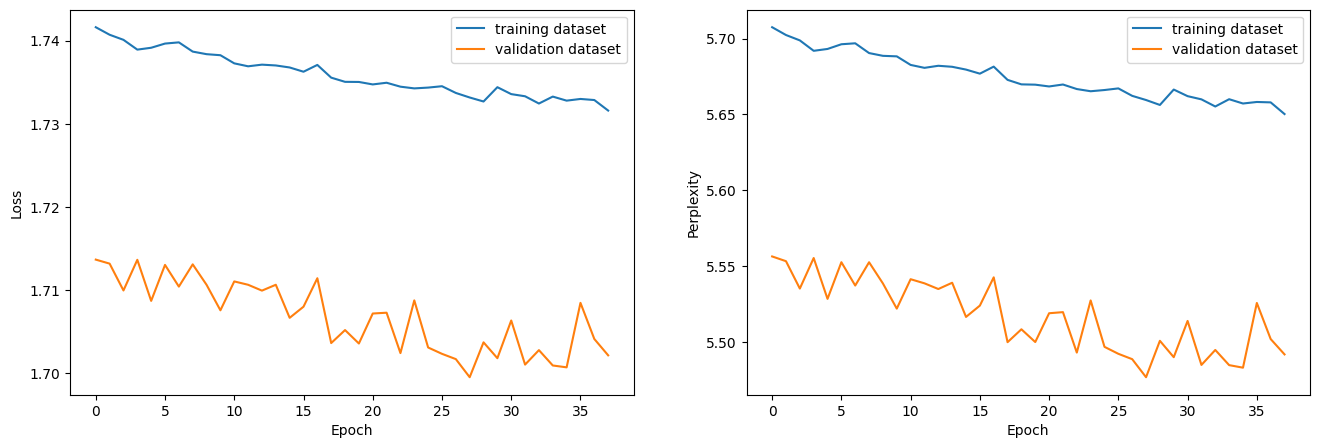

In [49]:
# Make two graphs, plotting respectively the Loss and Perplexity values

def plot_training_history(training_model):
  # Choose the number of plots, how they should appear (side to side), and the size of the final figure
  fig, axs = plt.subplots(1, 2, figsize=(16, 5))
  # Plot 1: Loss - plot a line graph for both the training and validation set values throughout the different epochs ('loss' and 'val_loss') in training_info
  axs[0].plot(training_model.history['loss'], label="training dataset")
  axs[0].plot(training_model.history['val_loss'], label="validation dataset")
  #axs[0].ylim((1, 10))
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Loss")
  axs[0].legend()
  # Plot 2: Perplexity - plot a line graph for both the training and validation set values throughout the different epochs
  axs[1].plot(training_model.history['perplexity'], label="training dataset")
  axs[1].plot(training_model.history['val_perplexity'], label="validation dataset")
  #axs[1].set_y_lim(0, 31)
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Perplexity")
  axs[1].legend()

  plt.show()

plot_training_history(training_model)

In [27]:
# Calculate loss and perplexity
# 5.87 test perplexity and 1.77 test loss for Embedding, output_dim = 28), EarlyStopping stopped at epoch 38
test_loss, test_perplexity = LSTMmodel.evaluate(Xtest, ytest, verbose=0)
print("Test loss:", test_loss)
print("Test perplexity:", test_perplexity)

Test loss: 1.7342791557312012
Test perplexity: 5.69478178024292


In [45]:

#Map indexes stored through word_to_index() back to their original form
index_to_letter = {i: l for l, i in letter_to_index.items()}

# Choose seed text
seed_text = "<s> "
# Choose how many characters you want the model to predict
next_letters = 3
#Create a list to add the tokenised and padded seed_text
sequence = []

#Lower, tokenise, and remove punctuation from seed_text
for text in seed_text:
  lower_t = [word.lower() for word in seed_text]
  for words in lower_t:
   tokenizer = RegexpTokenizer(r'\w+')
   token_word = tokenizer.tokenize(words)
   for word in token_word:
    for letter in word:
      sequence.append(letter_to_index[letter])

# Pad the sequence
padded_seq = pad_sequences([sequence], maxlen = len(sequence), padding = "post")

# Use model.predict to estimate how likely it is for each letter in the vocabulary to come after the seed_text
for i in range(next_letters):
  full_prediction = LSTMmodel.predict(padded_seq, verbose=0)
  next_three_letters = full_prediction[0][len(padded_seq) + i]
  # Use np.argmax to obtain the letter with the highest probability amongst the vocabulary items
  prediction = index_to_letter[np.argmax(next_three_letters)]
  # Add each prediction to the seed_text
  seed_text += prediction


# Print sequence
print("Next_three_letters:", seed_text)

Next_three_letters: <s> Have a merrene


1.	Data pre-processing

The present notebook makes use of all the seven texts made available for this assignment; namely: "The Adventures of Tom Sawyer" (Book 1), "Frankenstein" (Book 2), "Dracula" (Book 3), "Pride and Prejudice"(Book 4), "The Odyssey" (Book 5), "Moby Dick" (Book 6), and "Leviathan" (Book 7). The pre-processing of the data was facilitated by the use of several NLTK classes, such as the nltk.lm.Vocabulary and flatten functions, the nltk.util.pad_sequence utility function, and the nltk.tokenize.RegexpTokenizer function.
Upon inspection of the dataset, it became clear that the corpus contained letters belonging to non-Latin alphabets. Given the nature of the assignment - which required to build a language model able to predict the next three letters in a given English seed text - the data was pre-processed to include only letters that are part of the Latin alphabet by creating a new list which only comprised tokens present in the unicodedata dataset under the “LATIN” and “COMMON” code. The text was first stripped of empty strings and tokenised at the newline level. After eliminating foreign alphabet characters, the tokens were padded at the start and at the end of each sequence. A single flattened list was then created with each letter from the corpus forming a separate item. The empty spaces between words were kept, as they provided the model with useful information about the way in which different letters unfold into sequences of words, which may lead to a higher rate of correct predictions.

Using the nltk.lm.Vocabulary class, a list containing every letter present more than 50 times throughout the corpus was made. Analysis of the final dataset revealed a total length of 5737483 letters; a vocabulary set of 31 letters, which, upon inspection, included all letters of the English alphabet, as well as both designed chosen padding symbols (“< s>” and “< /s>”); while the total length of unique letters in the text was found to be 43, containing letters whose frequency was deemed to low to be relevant for the task ('ö', 'á', 'í', 'â', 'é', 'œ', 'à', 'ê', 'ù', 'ï', 'ë', 'ô', 'è'). Finally, the list was separated into a training set, which comprised all the letters in the corpus apart of the first 100000, which were selected to be used for the test set.

The aim of the neural network will be to predict which letter from the vocabulary is more likely to follow a text sequence - to this end, an index was then created to obtain a numerical equivalent of each letter in the list based on their position in the vocabulary. After indexing the train and test sets, the data was reshaped into an array by partitioning each set into arrays of shape (, 80) to obtain sequences of similar length: the training set, of dimension (70468, 80), and the test set, of dimension (1250, 80). An 80/20 split between the training and validation test was chosen for training over 200 epochs, with EarlyStopping being set at 10 to avoid overfitting - the model will monitor the loss function for the validation set and stop if the gradient descent has not decreased for more than 10 epochs.

2.	Recurrent neural network model

A sequential recurrent neural network model was created with the following characteristics:

a.	Embedding layer

The Embedding layer transforms each one-hot encoded input into a unique vector, which then is used by the language model to keep track of the relationships between the tokens; The letters that appear in similar context will have similar embeddings. The high-dimensional data is compressed, and the processing of dense vectors can make the model faster and more efficient.
The present model has been trained with vectors of different lengths - an input dimension of 28 yielded relatively high perplexity (5.87) and loss (1.76) values, while higher vector dimensions of 128 (Perplexity = , Loss = ) showed significantly lower results. This may be due to the complexity of the dataset, a longer vector may be able to capture more complex relationships between letters in the corpus.

b.	 Long Short-Term Model

After coverting our tokens to meaningful representations, an LSTM layer with 32 memory units was used to predict the next letter in the sequence while keeping track of the previous input.The network's internal gates allow the model to be trained through backpropagation and prevent vanishing gradient. The model returns the hidden state output for each input time step so that the output can be fed forward to a second LSTM hidden layer.

c. Dropout layer
The LSTM was followed by a dropout layer; this layer will randomly set 20% of the weights to zero before feeding the input to a second LSTM layer, which will have to re-learn some of the lost input. This layer has been added to avoid overfitting of the data.

d.	Long Short Term Model with dropout
The second LSTM model, of shape 32, updates the weights based on the input received by the dropout layer, re-learns some of the lost relationships between the tokens and forwards it to the next fully connected layer

d.	Dense layer
A final dense layer takes the output from the LSTM model and, using a softmax function, forces it into an integer between 0 and 1 representing. Opposite to the embedding layer, its role is to take the embeddings and return them to their one-hot encoded form in order to predict the needed vocabulary character. The TimeDistributed function was used to ... . Sparse categorical crossentropy. Adam. Perplexity.

After 100 epochs, the training was stopped as the loss function for the validation set stopped decreasing. Why loss? Two graphs were made showing the Loss and Perplexity values for both the training and validation sets. Inspection of the graphs shows that both sets are descending into convergence; however, the model does not present overfitting.
By using the model.predict() function, it's possible to confirm that the model generalises relatively well to unseen data, with the loss and perplexity values being similar to the ones observed at the local minimum for this model (Perplexity = , Loss = ). This result shows that the model's predictions of the next letter are as good as a random guess between close to six of the vocabulary characters. This remains a high degree of uncertainty - as made evident by using a seed_text ("< s> Merry christ") and asking the model to predict the next three letters, the model was able to accurately predict only one out of the three letters ("m")


3. Limitations and alternative solutions

Size of corpus

N-grams

Autoencoders

